In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

In [2]:
file = "output/merged_data.csv"
happy_data = pd.read_csv(file)
happy_data.head()

,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Workforce Gender Ratio
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,88.474361
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,86.841710
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,89.749667
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,89.450885
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,84.757937


# Of the factors that contribute to happiness scores, which best predict a country’s happiness score?

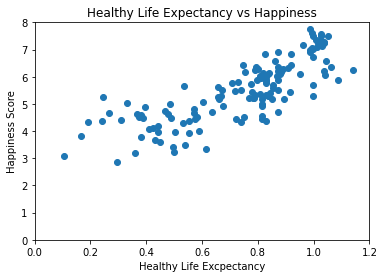

In [3]:
# Life expectancy vs. Happiness
xval=happy_data['Healthy life expectancy']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Healthy Life Excpectancy')
plt.ylabel('Happiness Score')
plt.title('Healthy Life Expectancy vs Happiness')
plt.xlim([0,1.2])
plt.ylim([0,8])
plt.show()

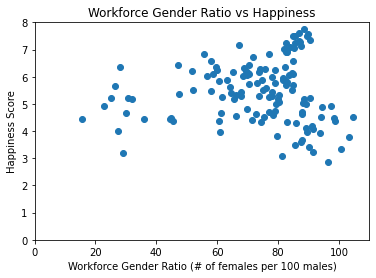

In [4]:
# Workforce gender ratio vs happiness
xval=happy_data['Workforce Gender Ratio']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Workforce Gender Ratio (# of females per 100 males)')
plt.ylabel('Happiness Score')
plt.title('Workforce Gender Ratio vs Happiness')
plt.xlim([0,110])
plt.ylim([0,8])
plt.show()

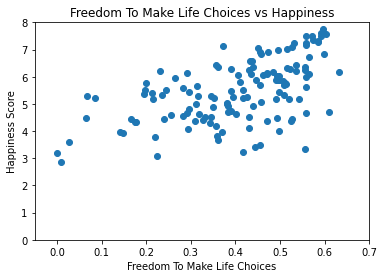

In [5]:
# Freedom to make life choices vs. Happiness
xval=happy_data['Freedom to make life choices']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Freedom To Make Life Choices')
plt.ylabel('Happiness Score')
plt.title('Freedom To Make Life Choices vs Happiness')
plt.xlim([-0.05,0.7])
plt.ylim([0,8])
plt.show()

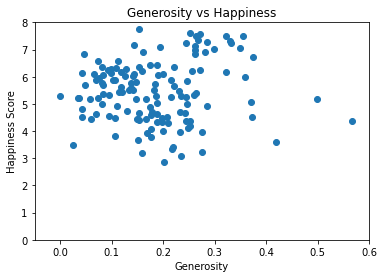

In [6]:
# Generosity vs Happiness
xval=happy_data['Generosity']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.title('Generosity vs Happiness')
plt.xlim([-0.05,0.6])
plt.ylim([0,8])
plt.show()

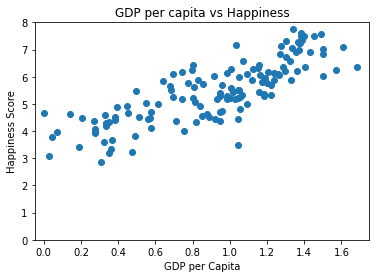

In [7]:
# GDP per capita vs World Happiness
xval=happy_data['GDP per capita']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('GDP per capita vs Happiness')
plt.xlim([-0.05,1.75])
plt.ylim([0,8])
plt.show()

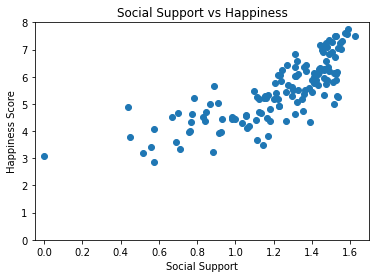

In [8]:
# Social support vs Happiness
xval=happy_data['Social support']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Social Support vs Happiness')
plt.xlim([-0.05,1.7])
plt.ylim([0,8])
plt.show()

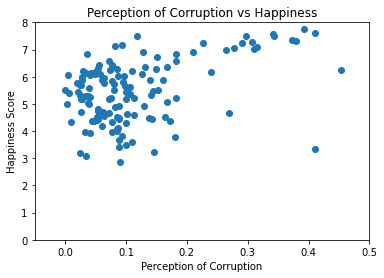

In [9]:
# Perception of corruption vs Happiness
xval=happy_data['Perceptions of corruption']
yval=happy_data['Score']
plt.scatter(xval, yval)
plt.xlabel('Perception of Corruption')
plt.ylabel('Happiness Score')
plt.title('Perception of Corruption vs Happiness')
plt.xlim([-0.05,0.5])
plt.ylim([0,8])
plt.show()

In [10]:
# Calculate the r values to indentify the strongest correlation
r_values = pd.DataFrame(columns=['variable','r'])
variables = ['gdp', 'ss','hlt','free','gen','corrupt','gender']
r_values['variable'] = variables

gdp_r = st.pearsonr(happy_data['GDP per capita'],happy_data['Score'])
ss_r = st.pearsonr(happy_data['Social support'],happy_data['Score'])
hlt_r = st.pearsonr(happy_data['Healthy life expectancy'],happy_data['Score'])
free_r = st.pearsonr(happy_data['Freedom to make life choices'],happy_data['Score'])
gen_r = st.pearsonr(happy_data['Generosity'],happy_data['Score'])
corrupt_r = st.pearsonr(happy_data['Perceptions of corruption'],happy_data['Score'])
gender_r = st.pearsonr(happy_data['Workforce Gender Ratio'],happy_data['Score'])

rVals = [gdp_r[0],ss_r[0],hlt_r[0],free_r[0],gen_r[0],corrupt_r[0],gender_r[0]]
r_values['r']=rVals
r_values

,variable,r
0,gdp,0.809406
1,ss,0.790806
2,hlt,0.804624
3,free,0.557619
4,gen,0.074800
5,corrupt,0.431120
6,gender,0.029835


# Hypotheses for the ANOVA test
Hypothesis: As GDP per Capita increases, a country's happiness score will increase.

Null hypothesis: GDP has no effect on a country’s happiness.

In [11]:
# ANOVA test on happiness scores using GDP per capita split into three groups (lowest, middle, highest)
gdp_df = happy_data[['Country', 'Score', 'GDP per capita']]
xvalue = happy_data['GDP per capita']
sorted_gdp = gdp_df.sort_values('GDP per capita')
sorted_gdp

# bin GDP into 3 groups 
low_gdp = sorted_gdp.iloc[:45,:]
med_gdp = sorted_gdp.iloc[45:90,:]
high_gdp = sorted_gdp.iloc[90:,:]


# ANOVA on happy scores within each group
all_gdps = st.f_oneway(high_gdp['Score'], med_gdp['Score'], low_gdp['Score'])
high_v_med = st.f_oneway(high_gdp['Score'], med_gdp['Score'])
med_v_low = st.f_oneway(low_gdp['Score'], med_gdp['Score'])
high_v_low = st.f_oneway(high_gdp['Score'], low_gdp['Score'])

p_values = pd.DataFrame(columns=['Variables Tested','p-value'])
variables = ['All GDPs', 'High v Med','Med v Low','High v Low']
p_values['Variables Tested'] = variables
p_values['p-value'] = [all_gdps[1], high_v_med[1], med_v_low[1], high_v_low[1]]

p_values

,Variables Tested,p-value
0,All GDPs,2.259331e-25
1,High v Med,9.811991e-12
2,Med v Low,1.429789e-07
3,High v Low,1.313581e-22


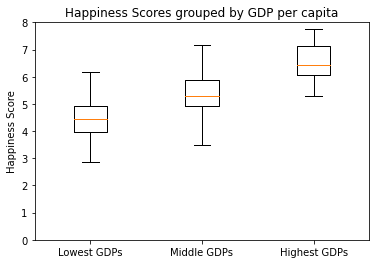

In [12]:
# Boxplots of happiness scores sorted by GDP per capita
labels = ['Lowest GDPs', 'Middle GDPs', 'Highest GDPs']
plt.boxplot([low_gdp['Score'], med_gdp['Score'], high_gdp['Score']], labels = labels)
plt.ylabel('Happiness Score')
plt.title('Happiness Scores grouped by GDP per capita')
plt.ylim([0,8])
plt.show()

# Conclusion:

After plotting each predictor against happiness scores and calculating each predictor's r-value, we determined that GDP per capita had the strongest correlation to a country's happiness score with an r-value of 0.809. After sorting the data by GDP and splitting them into three groups (lowest GDPs, middle GDPs, highest GDPs) and running the ANOVA test on the happiness scores, we reject the null hypothesis that GDP per capita has no effect on a country's happiness score. When comparing each GDP group using ANOVA, all p-values were below 0.05, suggesting that each group's happiness scores are independent of one another. As evidenced by the boxplot, when GDP per capita increases, happiness scores also increase.

# How does the ratio of females to males in the workforce correlate with a country’s GDP per capita?

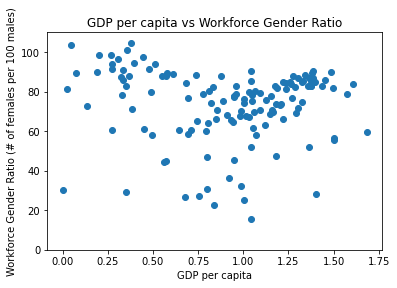

The correlation coefficient is -0.07711188040445868, suggesting there is no correlation.


In [14]:
# Scatterplot of GDP per capita vs Workforce Gender Ratio
xval=happy_data['GDP per capita']
yval=happy_data['Workforce Gender Ratio']
plt.scatter(xval,yval)
plt.title('GDP per capita vs Workforce Gender Ratio')
plt.xlabel('GDP per capita')
plt.ylabel('Workforce Gender Ratio (# of females per 100 males)')
plt.ylim([0,110])
plt.show()

gdp_and_workforce_rval = st.pearsonr(xval,yval)
print(f"The correlation coefficient is {gdp_and_workforce_rval[0]}, suggesting there is no correlation.")

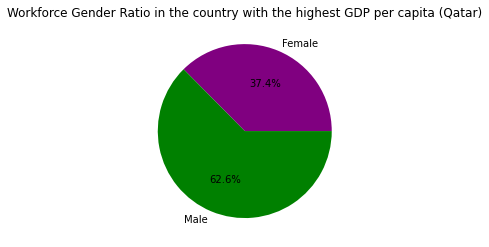

In [15]:
# GDP vs workforce ratio pie charts
# country with the highest GDP per capita
gdp_max = happy_data.loc[happy_data['GDP per capita'] == happy_data['GDP per capita'].max()]
num_female = gdp_max['Workforce Gender Ratio']
num_male = 100

colors=['purple', 'green']
labels=['Female','Male']
title='Workforce Gender Ratio in the country with the highest GDP per capita (Qatar)'
plt.pie([num_female,num_male], colors=colors, labels=labels, autopct='%1.1f%%')
plt.title(title)
plt.show()

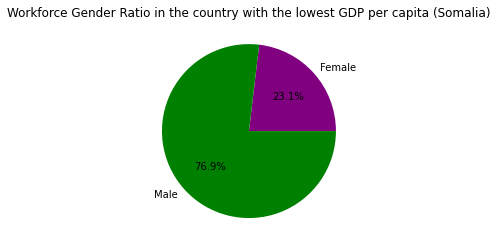

In [16]:
# Country with the lowest GDP per capita
gdp_min = happy_data.loc[happy_data['GDP per capita'] == happy_data['GDP per capita'].min()]

num_female = gdp_min['Workforce Gender Ratio']
num_male = 100

colors=['purple', 'green']
labels=['Female','Male']
title='Workforce Gender Ratio in the country with the lowest GDP per capita (Somalia)'
plt.pie([num_female,num_male], colors=colors, labels=labels, autopct='%1.1f%%')
plt.title(title)
plt.show()

# Conclusion:

We found no relationship between gender ratios of females to males in the workforce and GDP per capita, as the r-value is -0.077. Even though there was no relationship found, we were interested in the workforce gender ratios of the countries with the highest and lowest GDPs per capita, which can be viewed in the pie charts. 

# How does perceived government corruption relate to freedom to make life choices?

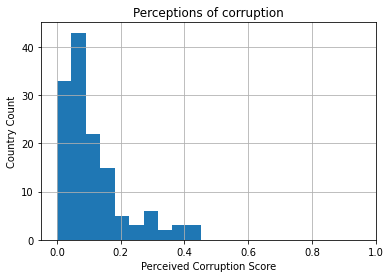

In [22]:
# Distribution of perceptions of corruption 
happy_data.hist('Perceptions of corruption')
plt.xlabel('Perceived Corruption Score')
plt.ylabel('Country Count')
plt.xlim([-0.05, 1])
plt.savefig('output/corrupt_histogram.png')

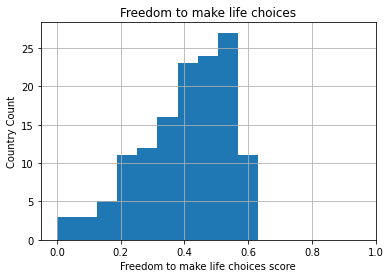

In [23]:
# Distribution of the variable freedom to make life choices
happy_data.hist('Freedom to make life choices')
plt.xlabel('Freedom to make life choices score')
plt.ylabel('Country Count')
plt.xlim([-0.05, 1])
plt.show()

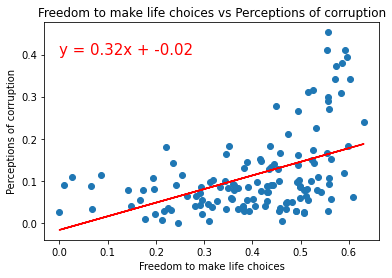

In [19]:
# Linear regression of freedom to make life choices and perceptions of corruption
xval=happy_data['Freedom to make life choices']
yval=happy_data['Perceptions of corruption']

slope, intercept, rval, pval, std_err = linregress(xval, yval)
regress_values = xval * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(xval,yval)
plt.plot(xval,regress_values,"r-")
plt.annotate(line_eq,(0,0.4),fontsize=15,color="red")
plt.xlabel('Freedom to make life choices')
plt.ylabel('Perceptions of corruption')
plt.title('Freedom to make life choices vs Perceptions of corruption')
plt.show()

# Conclusion

Based on the distribution of perceived corruption scores, most countries perceive their government and/or businesses to be corrupt. Based on the distribution of freedom to make life choices scores, it appears citizens of most countries in our data feel somewhat satisfied with the freedom they have to choose what they do with their life. Based on our linear regression, there is a weak positive correlation between these two predictors. Thus, people who feel more in control of making their life choices tend to perceive their government and/or bussinesses to be less corrupt.